In [1]:
import emcee
import geopandas as gpd
import pandas as pd
import EACartograms
import numpy as np
import copy
import matplotlib.pyplot as plt
from shapely.geometry import Point

In [2]:
# Import boundaries
# borders_df = gpd.read_file("./Data/Countries.geojson").to_crs('epsg:27700').reset_index()
borders_df = gpd.read_file("./Data/LADs.geojson").to_crs('epsg:27700').reset_index()

centroids_df = copy.copy(borders_df)
centroids_df['geometry'] = centroids_df.centroid

In [3]:
# Identify borders and proximity rankings

def get_borders(row):
    return borders_df.touches(row)

borders_matrix = borders_df['geometry'].apply(get_borders)





def get_separation(row):
    distances = centroids_df.distance(row)
    return distances    

separations_matrix = centroids_df['geometry'].apply(get_separation)


def get_proximity(row):
    distsort = np.argsort(row.values)
    return distsort[distsort]

p = separations_matrix.apply(get_proximity, axis=1)
proximity_matrix = np.zeros((len(borders_df), len(borders_df)), dtype=int)
for n in range(len(borders_df)):
    proximity_matrix[n, :] = p[n]

proximity_matrix = pd.DataFrame(proximity_matrix)

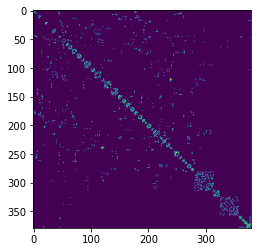

In [4]:
plt.imshow(borders_matrix)

In [5]:
def BorderingMetric(grid, borders_matrix, attributed_indices):
    cell_borders_matrix = np.zeros_like(borders_matrix)
    
    


def metric(scale, centrepoint, geodataframe, borders_matrix, proximity_matrix, attributed_indices):
    
    # Create grid
    grid = EACartograms.square_grid(len(geodataframe), scale, centrepoint)
    
    # Find attributed locations
    cellsdataframe = copy.copy(geodataframe)
#     return attributed_indices
    cellsdataframe['geometry'] = grid.PointGeoms(attributed_indices)
    cellsdataframe['cellcoords'] = [grid.num_to_geocoords(ind) for ind in attributed_indices]
    
    # Find Borderings
#     cell_borders = 
    return cellsdataframe
    

In [6]:
scale = 250000
centrepoint = (250000,500000)
geodataframe = borders_df
attributed_indices = list(range(len(borders_df)))

a = metric(scale, centrepoint, geodataframe, borders_matrix, proximity_matrix, attributed_indices)

In [8]:
a

,index,OBJECTID,LAD20CD,LAD20NM,LAD20NMW,BNG_E,BNG_N,LONG,LAT,Shape__Area,Shape__Length,geometry,cellcoords
0,0,1,E06000001,Hartlepool,,447160,531474,-1.27018,54.676140,9.602987e+07,51065.295913,POINT (-250000.000 -500000.000),"(-250000.0, -500000.0)"
1,1,2,E06000002,Middlesbrough,,451141,516887,-1.21099,54.544670,5.523139e+07,35500.386745,POINT (661.376 -500000.000),"(661.3756613756705, -500000.0)"
2,2,3,E06000003,Redcar and Cleveland,,464361,519597,-1.00608,54.567520,2.483428e+08,78449.389240,POINT (251322.751 -500000.000),"(251322.75132275134, -500000.0)"
3,3,4,E06000004,Stockton-on-Tees,,444940,518183,-1.30664,54.556911,2.052314e+08,87566.566061,POINT (501984.127 -500000.000),"(501984.126984127, -500000.0)"
4,4,5,E06000005,Darlington,,428029,515648,-1.56835,54.535339,1.988128e+08,91926.839545,POINT (752645.503 -500000.000),"(752645.5026455027, -500000.0)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
374,374,375,W06000020,Torfaen,Torfaen,327459,200480,-3.05101,51.698360,1.257167e+08,68469.967278,POINT (93497354.497 -500000.000),"(93497354.4973545, -500000.0)"
375,375,376,W06000021,Monmouthshire,Sir Fynwy,337812,209231,-2.90280,51.778271,8.544735e+08,181596.745222,POINT (93748015.873 -500000.000),"(93748015.87301588, -500000.0)"
376,376,377,W06000022,Newport,Casnewydd,337897,187432,-2.89769,51.582310,1.925400e+08,81882.194238,POINT (93998677.249 -500000.000),"(93998677.24867725, -500000.0)"
377,377,378,W06000023,Powys,Powys,302329,273255,-3.43531,52.348640,5.199755e+09,504309.884312,POINT (94249338.624 -500000.000),"(94249338.62433863, -500000.0)"
